In [1]:
from __future__ import division, print_function, unicode_literals

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import time
import re
import math
from docx import Document

# import packages for data visulatzation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# modeling routines from Scikit Learn packages for model develipment
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix , accuracy_score , classification_report, make_scorer,recall_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import regularizers

# obtain precision, recall, F1, and support metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# specify the set of classifiers being evaluated
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

import warnings
warnings.filterwarnings("ignore")
# set KMP_DUPLICATE_LIB_OK=TRUE      #  Windows
# set up randam seed
random_seed = 55
import tensorflow as tf
import torch
import platform

from sklearn.impute import KNNImputer
import pickle

In [2]:
df_input = pd.read_excel("E:/CNSI_project/demo_and_data_5.0/Processed_data/Extr_val/aim1_dataset_ExVal_0toNan_0.4filter_v2.1.xlsx", engine='openpyxl')
print(df_input.culture.value_counts())
# df_input = df_input.iloc[:,:-1]
df_input

0    1463
1     155
Name: culture, dtype: int64


,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,C_LeukocyteCount,culture
0,111.0,NaN,0.7,101.0,NaN,NaN,204.0,3.7,133.0,NaN,...,NaN,NaN,33.0,NaN,37.0,12.076923,NaN,NaN,4.0,0
1,NaN,3.1,0.5,107.0,NaN,NaN,NaN,3.4,138.0,10.8,...,NaN,46.743481,0.0,NaN,0.0,17.066667,NaN,NaN,0.0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,146.0,19.9,...,NaN,64.313626,37.0,6.0,1.0,NaN,NaN,NaN,7.0,0
3,NaN,NaN,0.7,111.0,NaN,NaN,NaN,3.6,145.0,14.4,...,NaN,41.291201,63.0,NaN,61.0,16.800000,NaN,NaN,7.0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.8,...,NaN,70.068995,9.0,16.0,1.0,NaN,NaN,NaN,26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,NaN,NaN,0.8,147.0,NaN,NaN,NaN,4.0,142.0,11.1,...,NaN,45.229078,4.0,NaN,85.0,22.065217,NaN,NaN,1500.0,1
1614,158.0,NaN,0.9,149.0,NaN,NaN,NaN,3.9,141.0,11.4,...,NaN,43.714376,11.0,4.0,69.0,23.571429,NaN,NaN,200.0,0
1615,98.0,NaN,1.0,142.0,NaN,NaN,274.0,3.8,143.0,10.6,...,NaN,44.320207,8.0,27.0,63.0,25.758621,NaN,NaN,1188.0,1
1616,111.0,NaN,0.9,156.0,NaN,NaN,NaN,4.9,142.0,9.8,...,NaN,44.925988,29.0,NaN,63.0,23.560000,NaN,NaN,96.0,0


In [4]:
df_ExVal = df_input.copy()
df_ExVal.culture.value_counts()

0    1463
1     155
Name: culture, dtype: int64

In [5]:
columns2 = df_ExVal.columns
index2 = df_ExVal.index

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/StandardPickleFiles/imputer_KNNImputer_corrected_aim1_FCN.pickle', 'rb') as f:  
    imputer = pickle.load(f)
    
df_ExVal = imputer.transform(df_ExVal)

df_ExVal = pd.DataFrame(df_ExVal, columns=columns2, index=index2)
df_ExVal['culture'] = df_ExVal['culture'].astype(np.int16)
df_ExVal

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,C_LeukocyteCount,culture
0,111.000000,3.721152,0.700000,101.000000,61.671770,0.877896,204.000000,3.700000,133.000000,12.077734,...,0.541904,41.409321,33.0,14.190444,37.0,12.076923,2.626119,2.545799,4.0,0
1,139.348003,3.100000,0.500000,107.000000,9.258087,1.569449,2620.160203,3.400000,138.000000,10.800000,...,0.920201,46.743481,0.0,42.066957,0.0,17.066667,6.388794,2.301038,0.0,0
2,110.304994,2.689947,1.112858,133.897223,6.467511,1.000000,285.672034,4.600000,146.000000,19.900000,...,0.491397,64.313626,37.0,6.000000,1.0,17.184647,8.430094,1.580340,7.0,0
3,127.524223,3.939468,0.700000,111.000000,10.159963,1.000000,290.539960,3.600000,145.000000,14.400000,...,0.562248,41.291201,63.0,3.503160,61.0,16.800000,2.115926,2.213122,7.0,0
4,165.609762,3.707620,1.927976,171.133098,36.452044,0.185359,230.658231,4.065763,142.856675,13.800000,...,0.432226,70.068995,9.0,16.000000,1.0,18.422130,6.621316,1.534895,26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,77.840787,4.107414,0.800000,147.000000,66.593870,0.663371,266.618723,4.000000,142.000000,11.100000,...,0.555308,45.229078,4.0,5.665156,85.0,22.065217,5.669927,1.844539,1500.0,1
1614,158.000000,3.571411,0.900000,149.000000,10.084128,0.622567,311.437212,3.900000,141.000000,11.400000,...,1.321197,43.714376,11.0,4.000000,69.0,23.571429,4.512930,2.123165,200.0,0
1615,98.000000,3.905522,1.000000,142.000000,8.041037,0.357064,274.000000,3.800000,143.000000,10.600000,...,1.878132,44.320207,8.0,27.000000,63.0,25.758621,5.035780,2.267476,1188.0,1
1616,111.000000,3.460762,0.900000,156.000000,19.498927,0.393969,408.776557,4.900000,142.000000,9.800000,...,1.996079,44.925988,29.0,22.297364,63.0,23.560000,6.040431,1.607155,96.0,0


In [6]:
X_ExVal = df_ExVal.iloc[:,:-1]
y_ExVal = df_ExVal.iloc[:,-1:]

In [7]:
with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/StandardPickleFiles/StandardScaler_corrected_aim1_FCN.pickle', 'rb') as f:  
    scaler = pickle.load(f)
X_ExVal = scaler.transform(X_ExVal)
X_ExVal

array([[-0.3262711 , -0.19315216, -0.32624177, ..., -0.75922627,
         0.80706773, -0.05074372],
       [ 0.19196324, -1.49394144, -0.5279807 , ...,  0.52257426,
         0.29074995, -0.05221937],
       [-0.33897661, -2.35265794,  0.09020552, ...,  1.21796756,
        -1.22955124, -0.04963698],
       ...,
       [-0.56392616,  0.19294859, -0.02363338, ...,  0.06165365,
         0.21995127,  0.38604876],
       [-0.3262711 , -0.73844984, -0.12450284, ...,  0.40390001,
        -1.17298506, -0.01680376],
       [ 0.58778683, -0.76896357, -0.32624177, ...,  1.17838595,
        -0.39879905, -0.05221937]])

# FCN Evaluation

In [8]:
# load model
model_names_path = os.path.join("E:/CNSI_project/demo_and_data_5.0/models_v2.2/aim1",'Aim1_FCN_38_0.8684061259217243_0.8333333333333334.h5')
from tensorflow.keras.models import load_model
model = load_model(model_names_path)

In [9]:
model.evaluate(X_ExVal, y_ExVal)

51/51 [==============================] - 2s 2ms/step - loss: 0.6253 - accuracy: 0.8146


[0.6253020167350769, 0.8145859241485596]

In [10]:
y_predict = model.predict(X_ExVal)
y_predict

51/51 [==============================] - 0s 918us/step


array([[0.42643696, 0.57356304],
       [0.8284167 , 0.1715833 ],
       [0.77287   , 0.22712998],
       ...,
       [0.06985662, 0.9301434 ],
       [0.27428466, 0.7257154 ],
       [0.72084904, 0.279151  ]], dtype=float32)

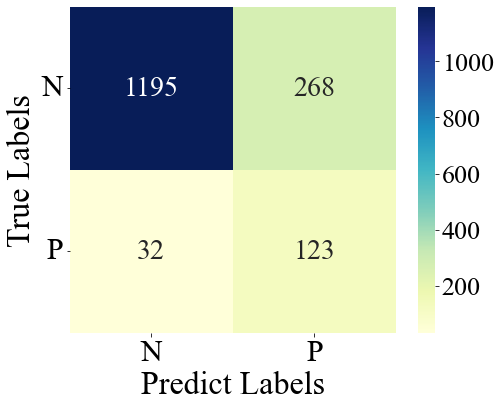

In [12]:
# generate confusion matrix
labels1 = ["N", "P"]
plt.figure(figsize = (8, 6))
cm = confusion_matrix(y_ExVal.values,y_predict.argmax(axis=1))
ax = sns.heatmap(cm, square=True, annot=True , cmap="YlGnBu", annot_kws={"fontsize":28}, fmt=".0f")   #square=True, annot=True showing number
# plt.matshow(cm)
# plt.title('Confusion matrix CNN', fontsize=18)
plt.ylabel("True Labels", fontsize=32)
plt.xlabel("Predict Labels", fontsize=32)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=26)

# plt.colorbar()
plt.xticks([i + 0.5 for i in range(len(labels1))], labels1, rotation = 0, fontsize=30)
plt.yticks([i + 0.5 for i in range(len(labels1))], labels1, rotation = 0, fontsize=30)

plt.show()

In [13]:
cm

array([[1195,  268],
       [  32,  123]], dtype=int64)

In [14]:
predict_matrix = np.zeros(cm.shape)
for i in range(cm.shape[0]):
    temp = np.sum(cm[i])
    for j in range(cm.shape[1]):
        predict_matrix[i,j] = cm[i,j]/temp
predict_matrix

array([[0.81681476, 0.18318524],
       [0.20645161, 0.79354839]])

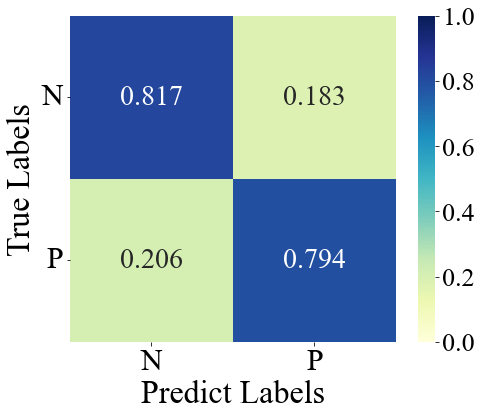

In [15]:
plt.figure(figsize = (8, 6))
ax = sns.heatmap(predict_matrix, square=True, annot=True ,cmap="YlGnBu", annot_kws={"fontsize":28}, fmt=".3f", vmin=0, vmax=1)
plt.xticks([i + 0.5 for i in range(len(predict_matrix))], labels1, rotation = 0, fontsize=30)
plt.yticks([i + 0.5 for i in range(len(predict_matrix))], labels1, rotation = 0, fontsize=30)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=26)

# plt.title('Confusion matrix of prediction', fontsize=18)
plt.ylabel("True Labels", fontsize=32)
plt.xlabel("Predict Labels", fontsize=32)

plt.show()

In [16]:
# calculate evaluation metric using test cohort
accuracy0 = np.round(accuracy_score(y_ExVal.values, 
               y_predict.argmax(axis=1)), decimals = 3)
print('\nFCN Predictive Accuracy: ',accuracy0)


FCN Predictive Accuracy:  0.815


In [17]:
print('\nSummary of FCN Precision and Recall\n') 
print(classification_report(y_ExVal, y_predict.argmax(axis=1), 
                            target_names = labels1, digits=3))


Summary of FCN Precision and Recall

              precision    recall  f1-score   support

           N      0.974     0.817     0.888      1463
           P      0.315     0.794     0.451       155

    accuracy                          0.815      1618
   macro avg      0.644     0.805     0.670      1618
weighted avg      0.911     0.815     0.847      1618



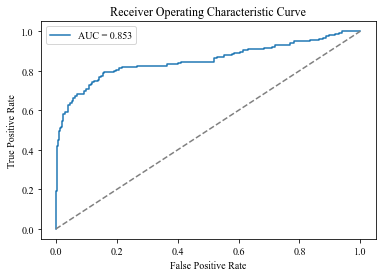

In [18]:
# Calculate AUC score and plot ROC curve
from sklearn.metrics import roc_curve, auc,roc_auc_score

# fpr, tpr, thresholds = roc_curve(label_true.ravel(), label_predict.ravel())
# auc = auc(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_ExVal, y_predict[:,1])
auc = roc_auc_score(y_ExVal, y_predict[:,1])

plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

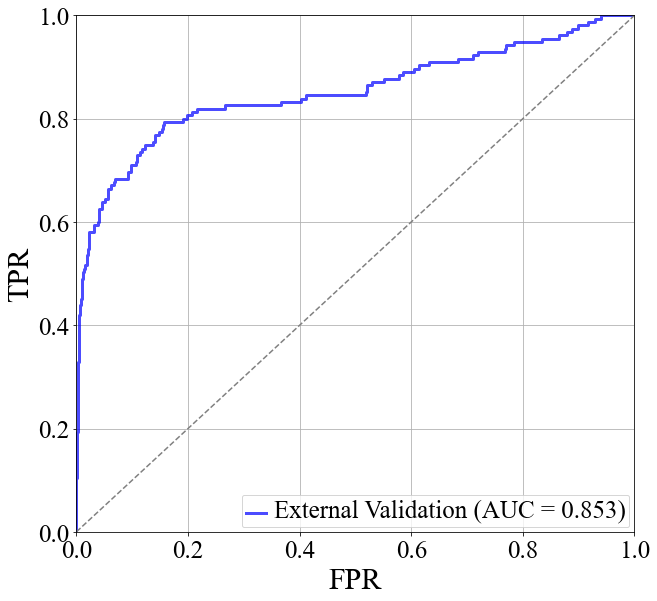

In [19]:
fpr_cnn, tpr_cnn, _ = roc_curve(y_ExVal, y_predict[:,1])
auc_cnn = roc_auc_score(y_ExVal, y_predict[:,1])

plt.figure(figsize=(10, 9.5))
plt.plot(fpr_cnn, tpr_cnn, color='blue', label=f'External Validation (AUC = {auc_cnn:.3f})', linewidth=3, alpha=0.7)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('FPR', fontsize=30, fontname='Times New Roman')  # False Positive Rate
plt.ylabel('TPR', fontsize=30, fontname='Times New Roman')    # True Positive Rate

legend = plt.legend(loc='lower right')
for text in legend.get_texts():
    text.set_fontname('Times New Roman')
    text.set_fontsize(25)
    
plt.grid()

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=25, fontname='Times New Roman')
plt.yticks(fontsize=25, fontname='Times New Roman')

plt.show()

In [20]:
y_predict.argmax(axis=1)

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [21]:
# df_input['predict'] = y_predict.argmax(axis=1)
# df_input.to_excel("E:/CNSI_project/demo_and_data_5.0/Processed_data/Extr_val/aim1_dataset_ExVal_0toNan_0.4filter_v2.1.xlsx",index=False)

# AUPRC、C-index and Brier Score

FCN AUPRC: 0.657
Baseline (positive class ratio): 0.096


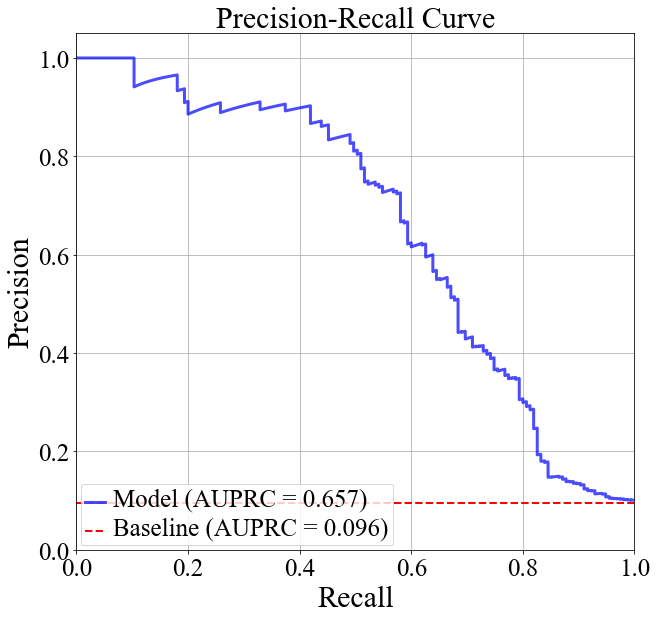

In [25]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, brier_score_loss
from lifelines.utils import concordance_index

# AUPRC
precision, recall, _ = precision_recall_curve(y_ExVal, y_predict[:,1])
auprc = auc(recall, precision)
print(f'FCN AUPRC: {auprc:.3f}')

baseline = y_ExVal.culture.value_counts()[1] / y_ExVal.shape[0]
print(f'Baseline (positive class ratio): {baseline:.3f}')

plt.figure(figsize=(10, 9.5))
plt.plot(recall, precision, color='blue', label=f'Model (AUPRC = {auprc:.3f})', linewidth=3, alpha=0.7)

plt.axhline(y=baseline, color='red', linestyle='--', label=f'Baseline (AUPRC = {baseline:.3f})', linewidth=2)

plt.xlabel('Recall', fontsize=30, fontname='Times New Roman')
plt.ylabel('Precision', fontsize=30, fontname='Times New Roman')
plt.title('Precision-Recall Curve', fontsize=30, fontname='Times New Roman')

legend = plt.legend(loc='lower left')
for text in legend.get_texts():
    text.set_fontname('Times New Roman')
    text.set_fontsize(25)

plt.grid()

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=25, fontname='Times New Roman')
plt.yticks(fontsize=25, fontname='Times New Roman')

plt.show()

In [26]:
# C-index
c_index = concordance_index(y_ExVal, y_predict[:,1])
print(f'FCN C-index: {c_index:.3f}')

FCN C-index: 0.853


In [27]:
# Brier Score
brier_score = brier_score_loss(y_ExVal, y_predict[:,1])
print(f'FCN Brier Score: {brier_score:.3f}')

FCN Brier Score: 0.161
